### Installing and importing libraries

In [ ]:
!pip install catboost

In [ ]:
#data manipulation libraries
import pandas as pd
import numpy as np

#data visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

#model testing and feature engineering libraries
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error ,accuracy_score,r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#models used
from lightgbm import LGBMRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression , Lasso, Ridge, OrthogonalMatchingPursuitCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

In [ ]:
#reading the data
df = pd.read_csv("D:\DATA SCIENCE\DS INTERNSHIP\HAMOYE INTERNSHIP\Project Beanstalk\Daily Demand Forecasting Orders.csv")

**EXPLORATORY DATA ANALYSIS**

In [ ]:
df.head()

Unnamed: 0  \
0           0   
1           1   
2           2   
3           3   
4           4   

   Week of the month (first week, second, third, fourth or fifth week  \
0                                                  1                    
1                                                  1                    
2                                                  1                    
3                                                  2                    
4                                                  2                    

   Day of the week (Monday to Friday)  Non-urgent order  Urgent order  \
0                                   4           316.307       223.270   
1                                   5           128.633        96.042   
2                                   6            43.651        84.375   
3                                   2           171.297       127.667   
4                                   3            90.532       113.526   

   Order type A  Order type B  Order type C  Fiscal sector orders  \
0        61.543       175.586       302.448                 0.000   
1        38.058        56.037       130.580                 0.000   
2        21.826        25.125        82.461                 1.386   
3        41.542       113.294       162.284                18.156   
4        37.679        56.618       116.220                 6.459   

   Orders from the traffic controller sector  Banking orders (1)  \
0                                      65556               44914   
1                                      40419               21399   
2                                      11992                3452   
3                                      49971               33703   
4                                      48534               19646   

   Banking orders (2)  Banking orders (3)  Target (Total orders)  
0              188411               14793                539.577  
1               89461                7679                224.675  
2               21305               14947                129.412  
3               69054               18423                317.120  
4               16411               20257                210.517

In [ ]:
#getting the shape of the dataset
df.shape

(60, 14)

In [ ]:
# getting the columns of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 14 columns):
 #   Column                                                              Non-Null Count  Dtype  
---  ------                                                              --------------  -----  
 0   Unnamed: 0                                                          60 non-null     int64  
 1   Week of the month (first week, second, third, fourth or fifth week  60 non-null     int64  
 2   Day of the week (Monday to Friday)                                  60 non-null     int64  
 3   Non-urgent order                                                    60 non-null     float64
 4   Urgent order                                                        60 non-null     float64
 5   Order type A                                                        60 non-null     float64
 6   Order type B                                                        60 non-null     float64
 7   Order type C       

In [ ]:
#check for missing values - NO MISSING VALUES
df.isnull().sum()

Unnamed: 0                                                            0
Week of the month (first week, second, third, fourth or fifth week    0
Day of the week (Monday to Friday)                                    0
Non-urgent order                                                      0
Urgent order                                                          0
Order type A                                                          0
Order type B                                                          0
Order type C                                                          0
Fiscal sector orders                                                  0
Orders from the traffic controller sector                             0
Banking orders (1)                                                    0
Banking orders (2)                                                    0
Banking orders (3)                                                    0
Target (Total orders)                                           

In [ ]:
#checks for duplicates- NO DUPLICATE VALUES
duplicates=df[df.duplicated()]
duplicates

Empty DataFrame
Columns: [Unnamed: 0, Week of the month (first week, second, third, fourth or fifth week, Day of the week (Monday to Friday), Non-urgent order, Urgent order, Order type A, Order type B, Order type C, Fiscal sector orders, Orders from the traffic controller sector, Banking orders (1), Banking orders (2), Banking orders (3), Target (Total orders)]
Index: []

In [ ]:
#let check the basic statistics of the data= THERE IS TENDENCY OF OUTLIERS IN SOME OF THE COLUMNS
df.describe().T

count          mean  \
Unnamed: 0                                           60.0     29.500000   
Week of the month (first week, second, third, f...   60.0      3.016667   
Day of the week (Monday to Friday)                   60.0      4.033333   
Non-urgent order                                     60.0    172.554933   
Urgent order                                         60.0    118.920850   
Order type A                                         60.0     52.112217   
Order type B                                         60.0    109.229850   
Order type C                                         60.0    139.531250   
Fiscal sector orders                                 60.0     77.396133   
Orders from the traffic controller sector            60.0  44504.350000   
Banking orders (1)                                   60.0  46640.833333   
Banking orders (2)                                   60.0  79401.483333   
Banking orders (3)                                   60.0  23114.633333   
Target (Total orders)                                60.0    300.873317   

                                                             std        min  \
Unnamed: 0                                             17.464249      0.000   
Week of the month (first week, second, third, f...      1.282102      1.000   
Day of the week (Monday to Friday)                      1.401775      2.000   
Non-urgent order                                       69.505788     43.651   
Urgent order                                           27.170929     77.371   
Order type A                                           18.829911     21.826   
Order type B                                           50.741388     25.125   
Order type C                                           41.442932     74.372   
Fiscal sector orders                                  186.502470      0.000   
Orders from the traffic controller sector           12197.905134  11992.000   
Banking orders (1)                                  45220.736293   3452.000   
Banking orders (2)                                  40504.420041  16411.000   
Banking orders (3)                                  13148.039829   7679.000   
Target (Total orders)                                  89.602041    129.412   

                                                            25%         50%  \
Unnamed: 0                                             14.75000     29.5000   
Week of the month (first week, second, third, f...      2.00000      3.0000   
Day of the week (Monday to Friday)                      3.00000      4.0000   
Non-urgent order                                      125.34800    151.0625   
Urgent order                                          100.88800    113.1145   
Order type A                                           39.45625     47.1665   
Order type B                                           74.91625     99.4820   
Order type C                                          113.63225    127.9900   
Fiscal sector orders                                    1.24325      7.8315   
Orders from the traffic controller sector           34994.25000  44312.0000   
Banking orders (1)                                  20130.00000  32527.5000   
Banking orders (2)                                  50680.50000  67181.0000   
Banking orders (3)                                  12609.75000  18011.5000   
Target (Total orders)                                 238.19550    288.0345   

                                                            75%         max  
Unnamed: 0                                             44.25000      59.000  
Week of the month (first week, second, third, f...      4.00000       5.000  
Day of the week (Monday to Friday)                      5.00000       6.000  
Non-urgent order                                      194.60650     435.304  
Urgent order                                          132.10825     223.270  
Order type A                                           58.46375     118.178  
Order ty

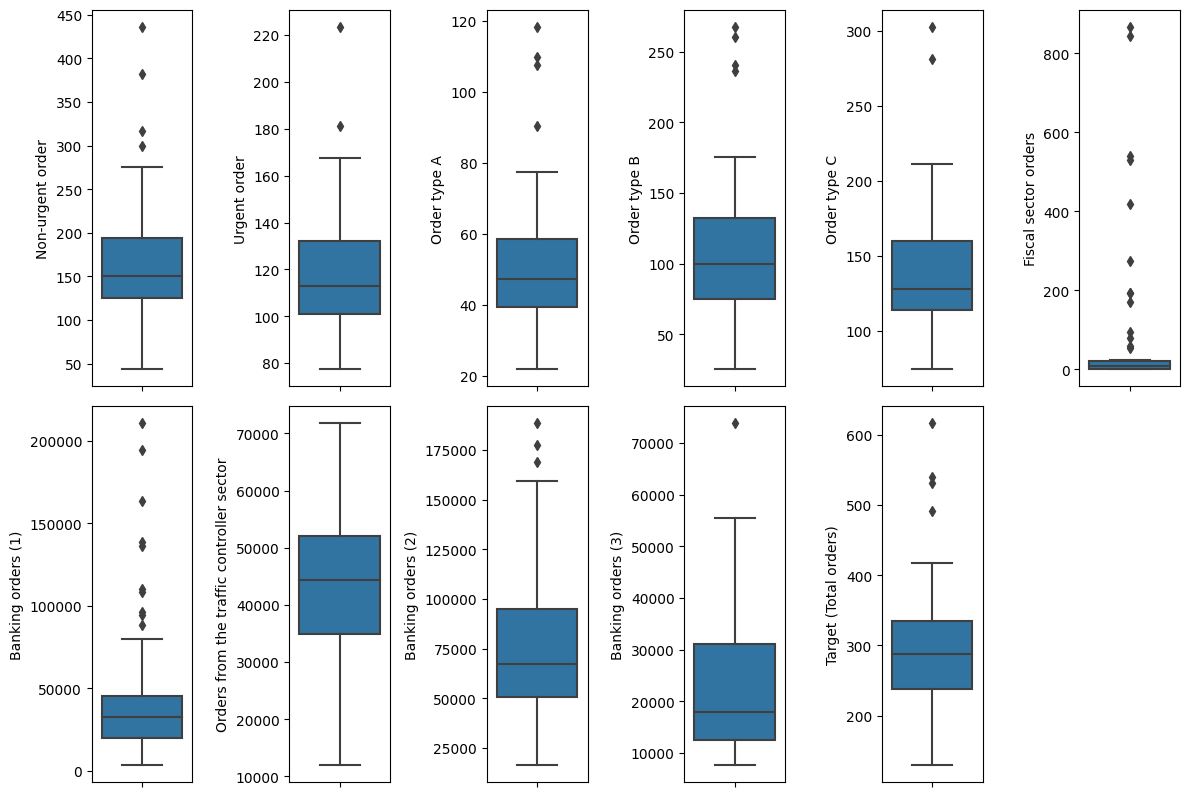

In [ ]:
#Lets check for outliers using boxplot = the output shows that the column for Fiscal sector orders
#and Banking orders (1) has outliers.
f, axes = plt.subplots(3, 6, figsize=(12, 12))

axes = axes.flatten()
columns = ['Non-urgent order', 'Urgent order', 'Order type A', 'Order type B', 'Order type C',
           'Fiscal sector orders', 'Banking orders (1)', 'Orders from the traffic controller sector',
           'Banking orders (2)', 'Banking orders (3)', 'Target (Total orders)']

for col, ax in zip(columns, axes):
    sns.boxplot(y=col, data=df, ax=ax)

for i in range(len(columns), len(axes)):
    f.delaxes(axes[i])

plt.tight_layout()

plt.show()

In [ ]:
#let check for data skewness =MOST OF THE DATA ARE POSIVITELY SKEW BUT ARE ALL WITH THE ACCEPTABLE RANGE
df.skew()

Unnamed: 0                                                            0.000000
Week of the month (first week, second, third, fourth or fifth week    0.017892
Day of the week (Monday to Friday)                                   -0.022888
Non-urgent order                                                      1.546244
Urgent order                                                          1.300066
Order type A                                                          1.724497
Order type B                                                          1.339496
Order type C                                                          1.728385
Fiscal sector orders                                                  3.146895
Orders from the traffic controller sector                             0.039353
Banking orders (1)                                                    2.043421
Banking orders (2)                                                    0.948538
Banking orders (3)                                  

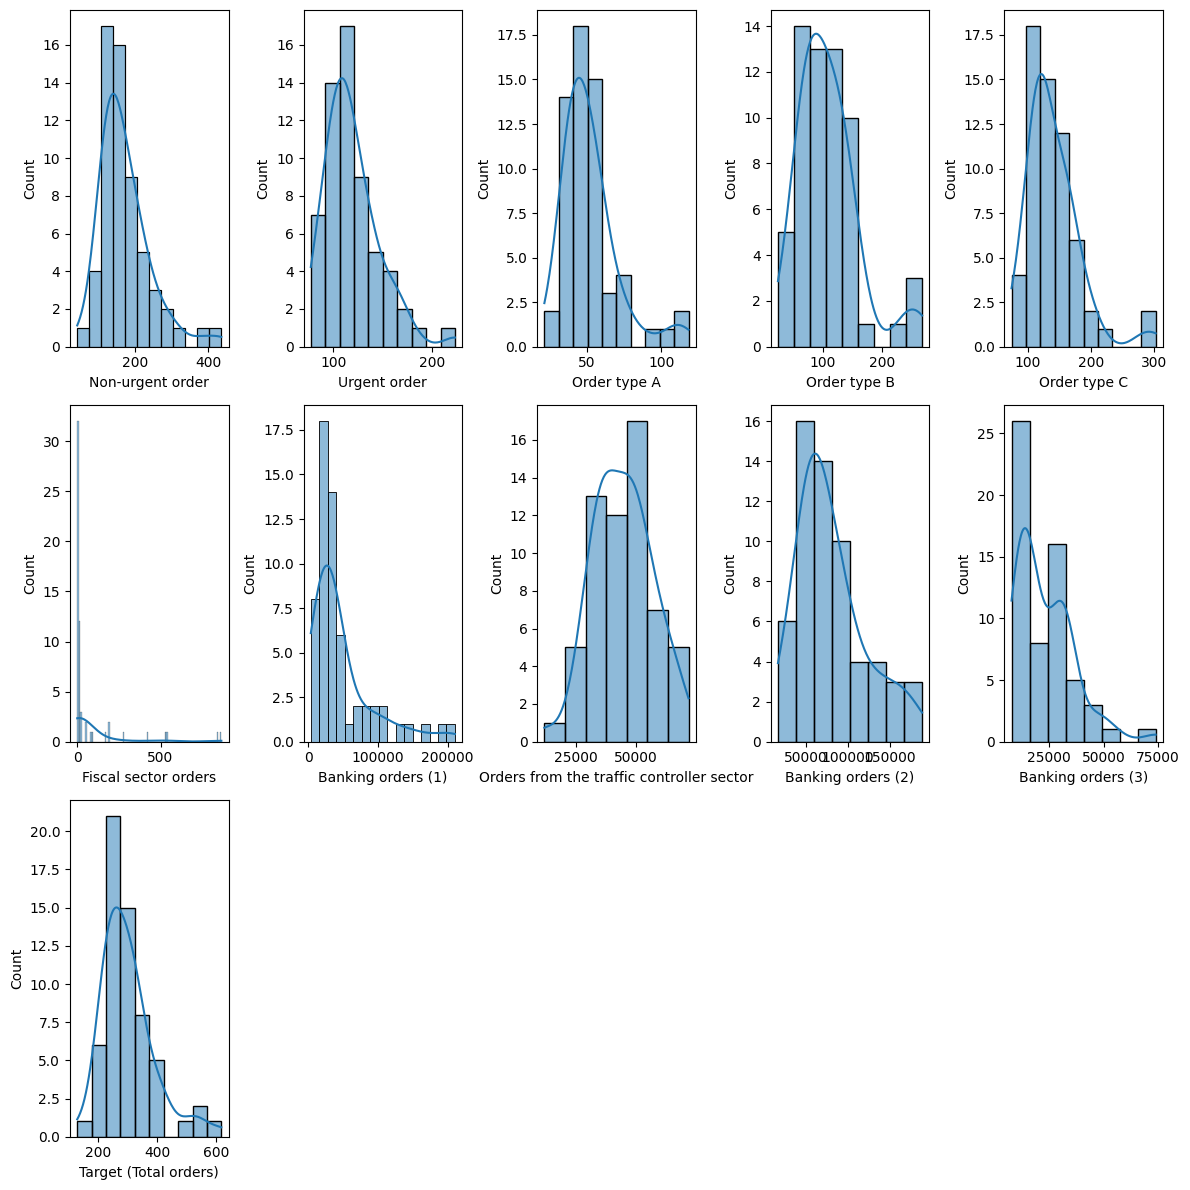

In [ ]:
#Lets check the distribution using histogram= as can be seen most data are skewed to the right with more bar in the
# right side of the mean, however, they are all almost normally distributed
f, axes = plt.subplots(3, 5, figsize=(12, 12))

axes = axes.flatten()

columns = ['Non-urgent order', 'Urgent order', 'Order type A', 'Order type B', 'Order type C',
           'Fiscal sector orders', 'Banking orders (1)', 'Orders from the traffic controller sector',
           'Banking orders (2)', 'Banking orders (3)', 'Target (Total orders)']

for col, ax in zip(columns, axes):
    sns.histplot(data=df, x=col, kde=True, ax=ax)

for i in range(len(columns), len(axes)):
    f.delaxes(axes[i])

plt.tight_layout()
plt.show()

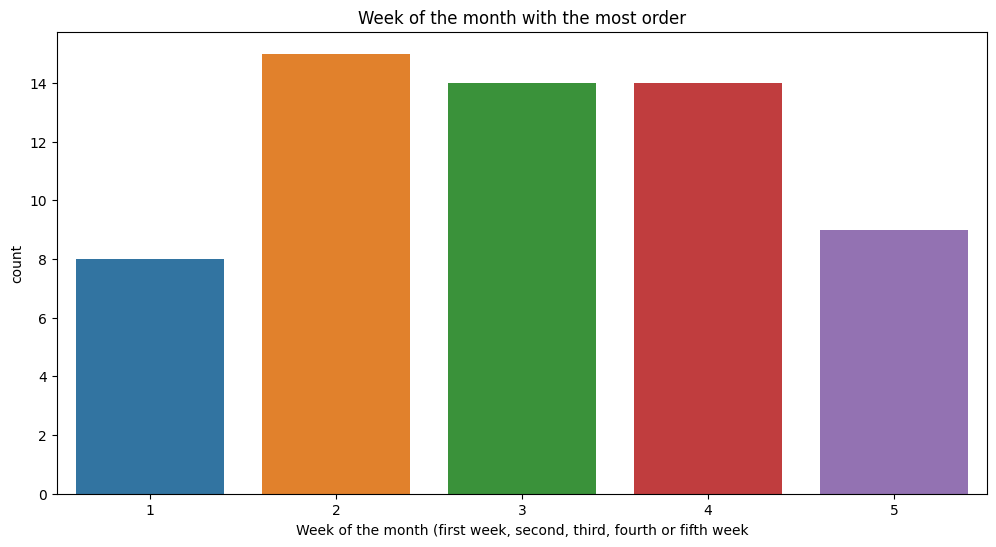

In [ ]:
#week order seem to be more in week 2 compare to other week, although week 3 and 4 are not far off.
#However, week 1 seem to have orders
plt.figure(figsize=(12,6))
sns.countplot(x='Week of the month (first week, second, third, fourth or fifth week', data=df)
plt.title('Week of the month with the most order');

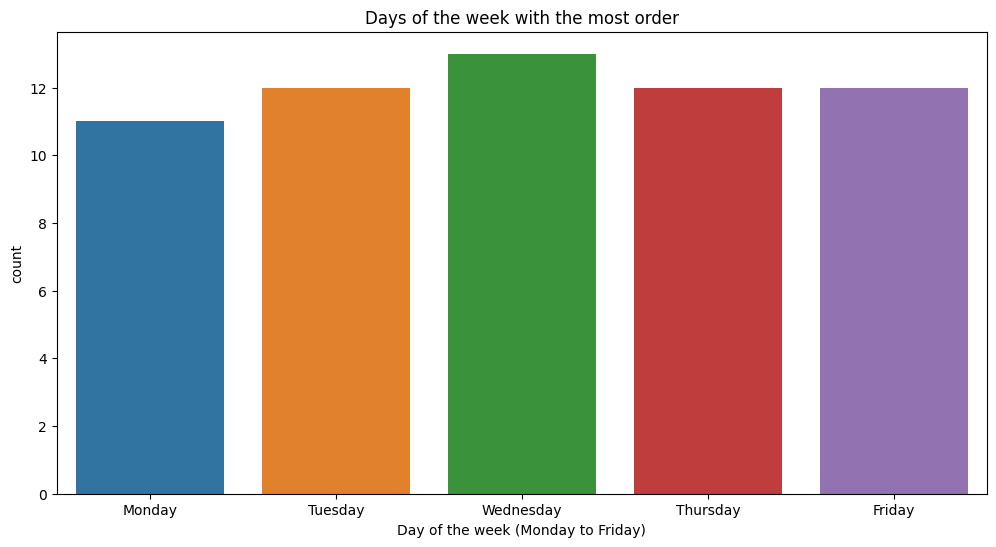

In [ ]:
# there seem not to be much difference in the order base on days of the week
#however, like the week of the month, order seem to start slow on the first day of the week and get to itS peak by wednesday
#and then start decreasing from thursday again
plt.figure(figsize=(12,6))
fig=sns.countplot(x='Day of the week (Monday to Friday)', data=df)
fig.set(xticklabels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])
plt.title('Days of the week with the most order');

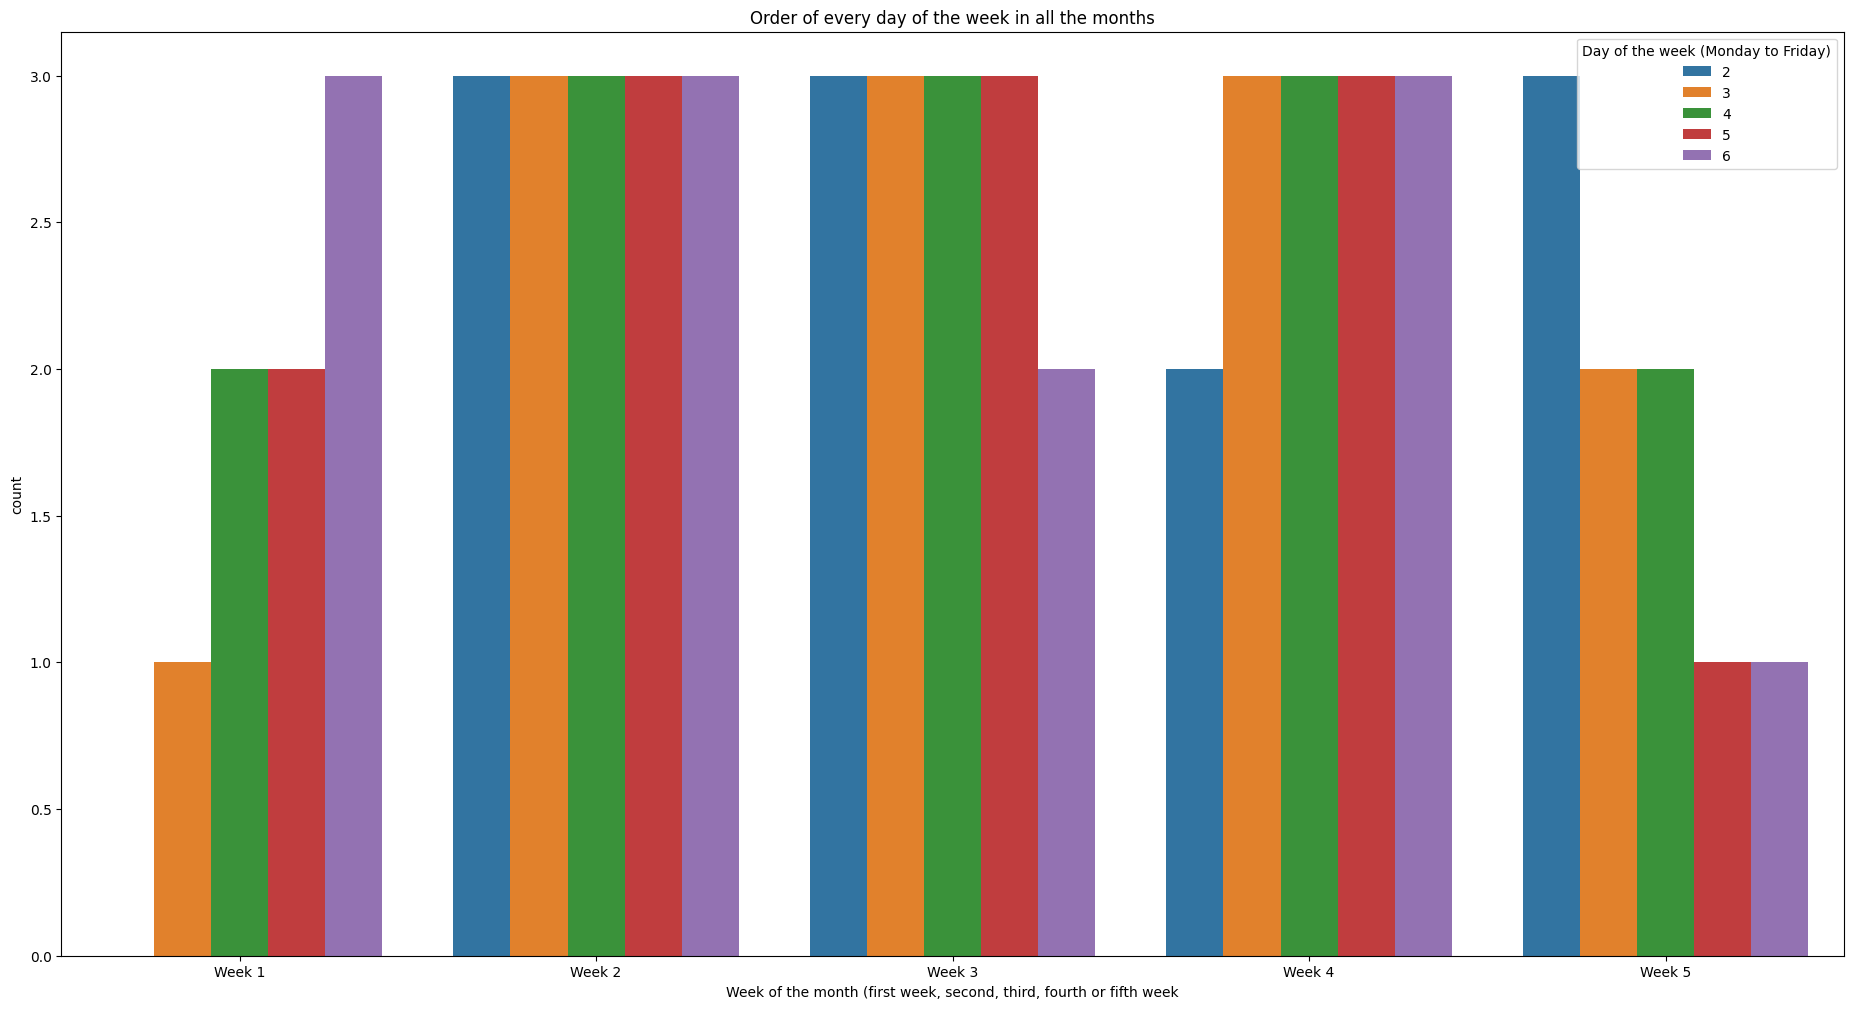

In [ ]:
#now if we break DOWN the order to day of the week in every month
#we found out that order begin to rise from friday of week 1, get to its peak in week 2,3 and 4 and start to
#falling from tuesday of week 5
plt.figure(figsize=(23,12))
fig =sns.countplot(x='Week of the month (first week, second, third, fourth or fifth week', hue='Day of the week (Monday to Friday)', data=df)
fig.set(xticklabels=['Week 1', 'Week 2', 'Week 3', 'Week 4', 'Week 5'])
#plt.legend(['Monday', 'Tuesday', 'Wednsday', 'Thurdsday', 'Friday'])
plt.title('Order of every day of the week in all the months');

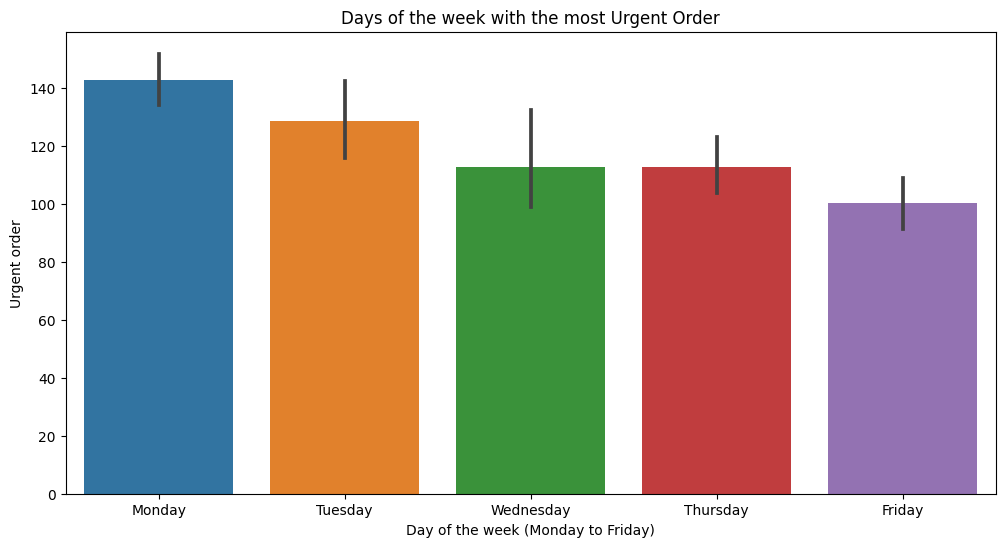

In [ ]:
#Interestly people seem to spend more on Urgent Order on Mondays and decrease slowly to Friday
plt.figure(figsize=(12,6))
fig =sns.barplot(x='Day of the week (Monday to Friday)', y='Urgent order', data=df)
fig.set(xticklabels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])

plt.title('Days of the week with the most Urgent Order');

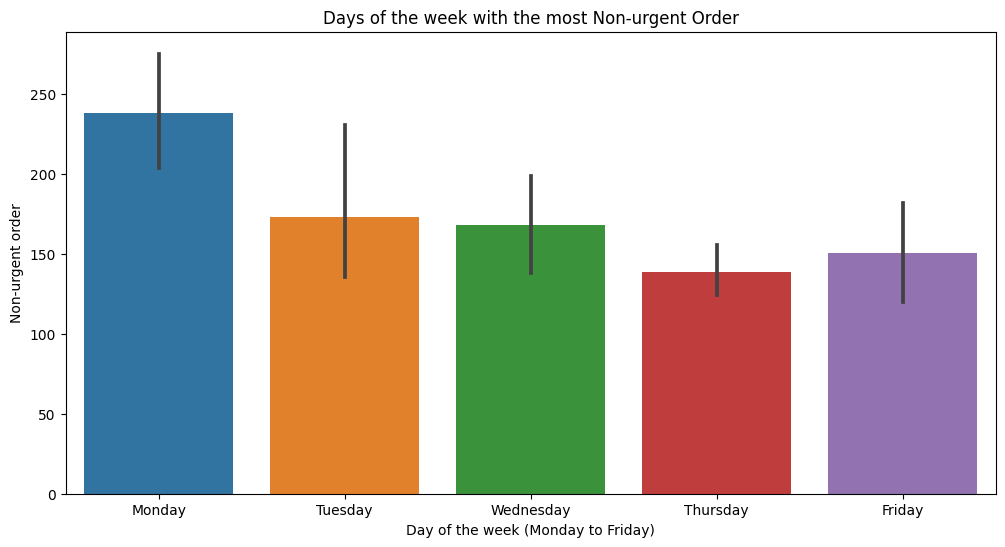

In [ ]:
#Again, like urgent order, people seem to spend more on Non-urgent on a monday and decrease down the week
plt.figure(figsize=(12,6))
fig =sns.barplot(x='Day of the week (Monday to Friday)', y='Non-urgent order', data=df)
fig.set(xticklabels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])
plt.title('Days of the week with the most Non-urgent Order');

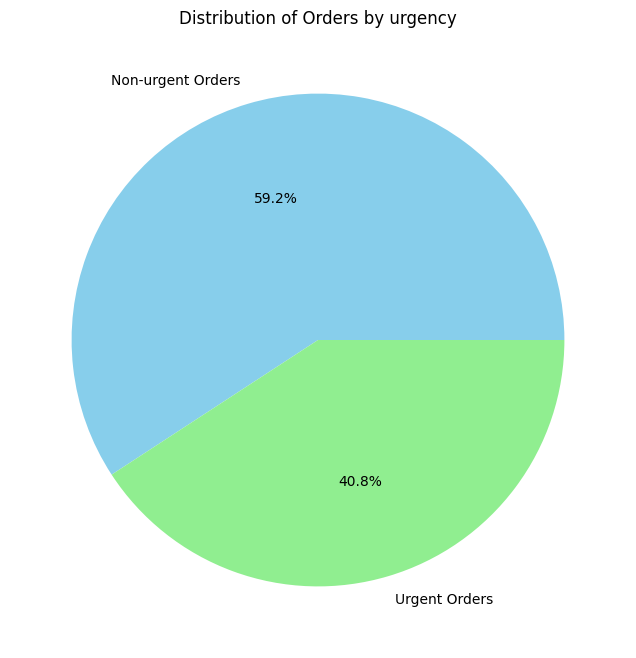

In [ ]:
#let's check the order distribution by urgency= As expected Non-urgent orders are higher at 59.2#
#however, the percentage of urgent order are surprising high at 40+%=

labels = ['Non-urgent Orders', 'Urgent Orders']
data = [df['Non-urgent order' ].sum(), df['Urgent order'].sum()]

plt.figure(figsize=(12, 8))
plt.pie(data, labels=labels, autopct='%1.1f%%', colors=['skyblue', 'lightgreen'])
plt.title('Distribution of Orders by urgency')

plt.show()

In [ ]:
#order type c is the most common type with 46.4%, follow by order type B, order type A has the lowest with
#just 17.3 %

labels = ['Order type A', 'Order type B', 'Order type C']
data = [df['Order type A'].sum(), df['Order type B'].sum(), df['Order type C'].sum()]

df_data = pd.DataFrame({'labels': labels, 'data': data})


fig = px.pie(df_data, values='data', names='labels', labels={'labels': 'Order Type'})


fig.update_layout(title='Distribution of Order Based on Types')


fig.show()

<Axes: >

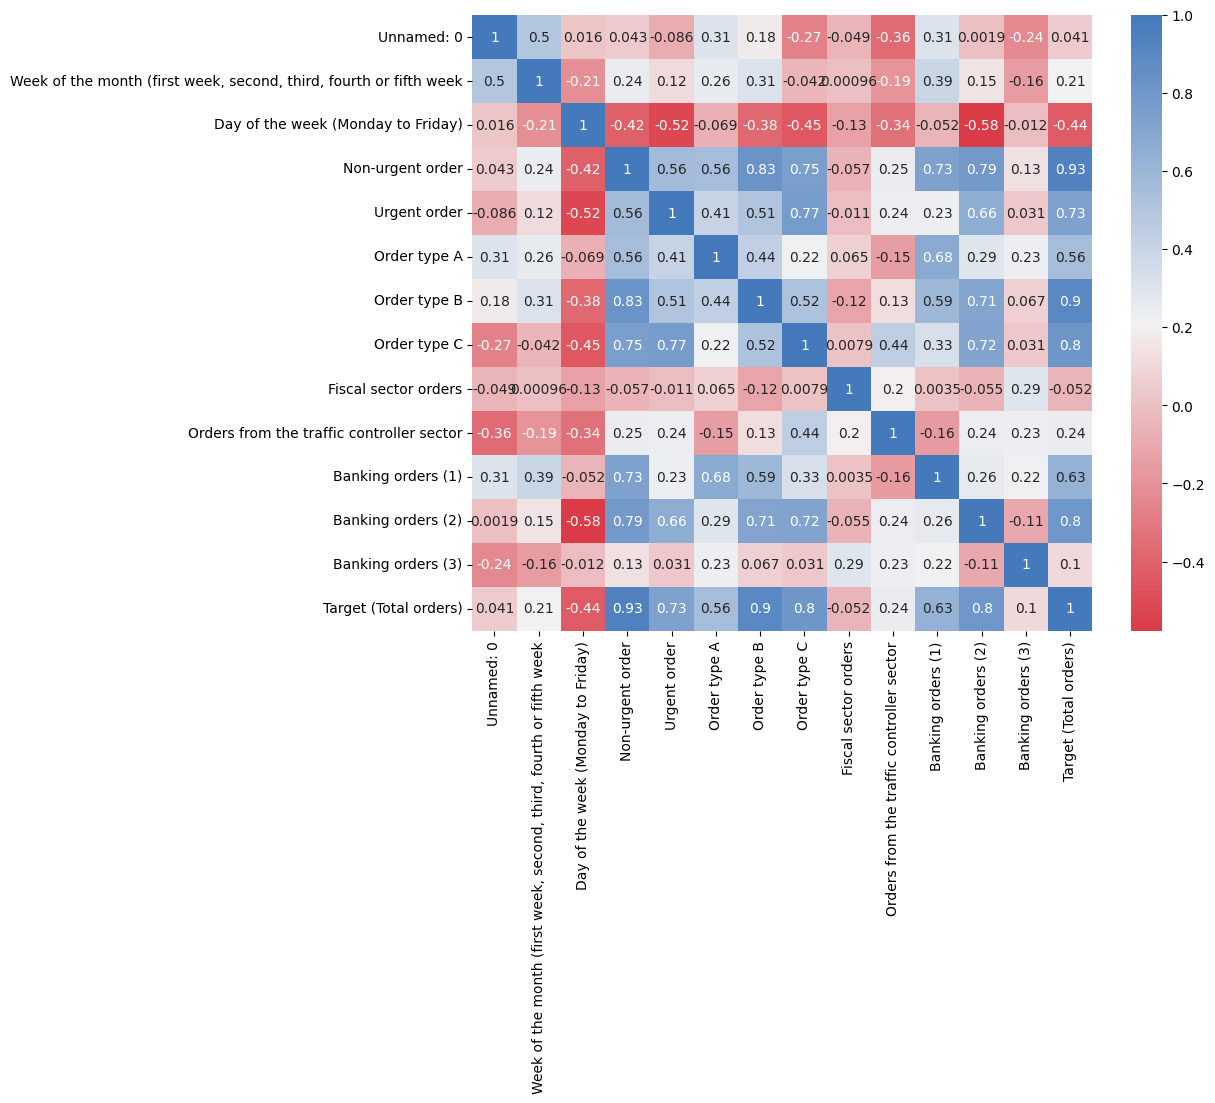

In [ ]:
plt.figure(figsize=(10,8))
corr = df.corr()
sns.heatmap(corr, annot = True, cmap=sns.diverging_palette(10, 250, as_cmap=True))

**DATA PREPARATION**

FEATURE SELECTION

In [ ]:
#defining the target column
X_check = df.drop(columns=['Target (Total orders)'])
y_check = df['Target (Total orders)']

In [ ]:
#scaling the dataset
scaler1 = StandardScaler()

X_scaled_check = scaler1.fit_transform(X_check)

- The dataset was scaled using standard scaler

In [ ]:
#fitting a decision tree on the dataset
dt_model = DecisionTreeRegressor()

dt_model.fit(X_scaled_check, y_check)

DecisionTreeRegressor()

- A decision tree was used on the dataset

In [ ]:
#checking the r2 score of the data
print("The r2_score of the model is: ", r2_score(dt_model.predict(X_scaled_check), y_check))

The r2_score of the model is:  1.0


- The r2 score of the model is 1.0 on the training set

In [ ]:
#getting the accuracy score of the model
print("The model score is: ",dt_model.score(X_scaled_check, y_check))

The model score is:  1.0


- The accuracy score of the model is 1.0 on the training set

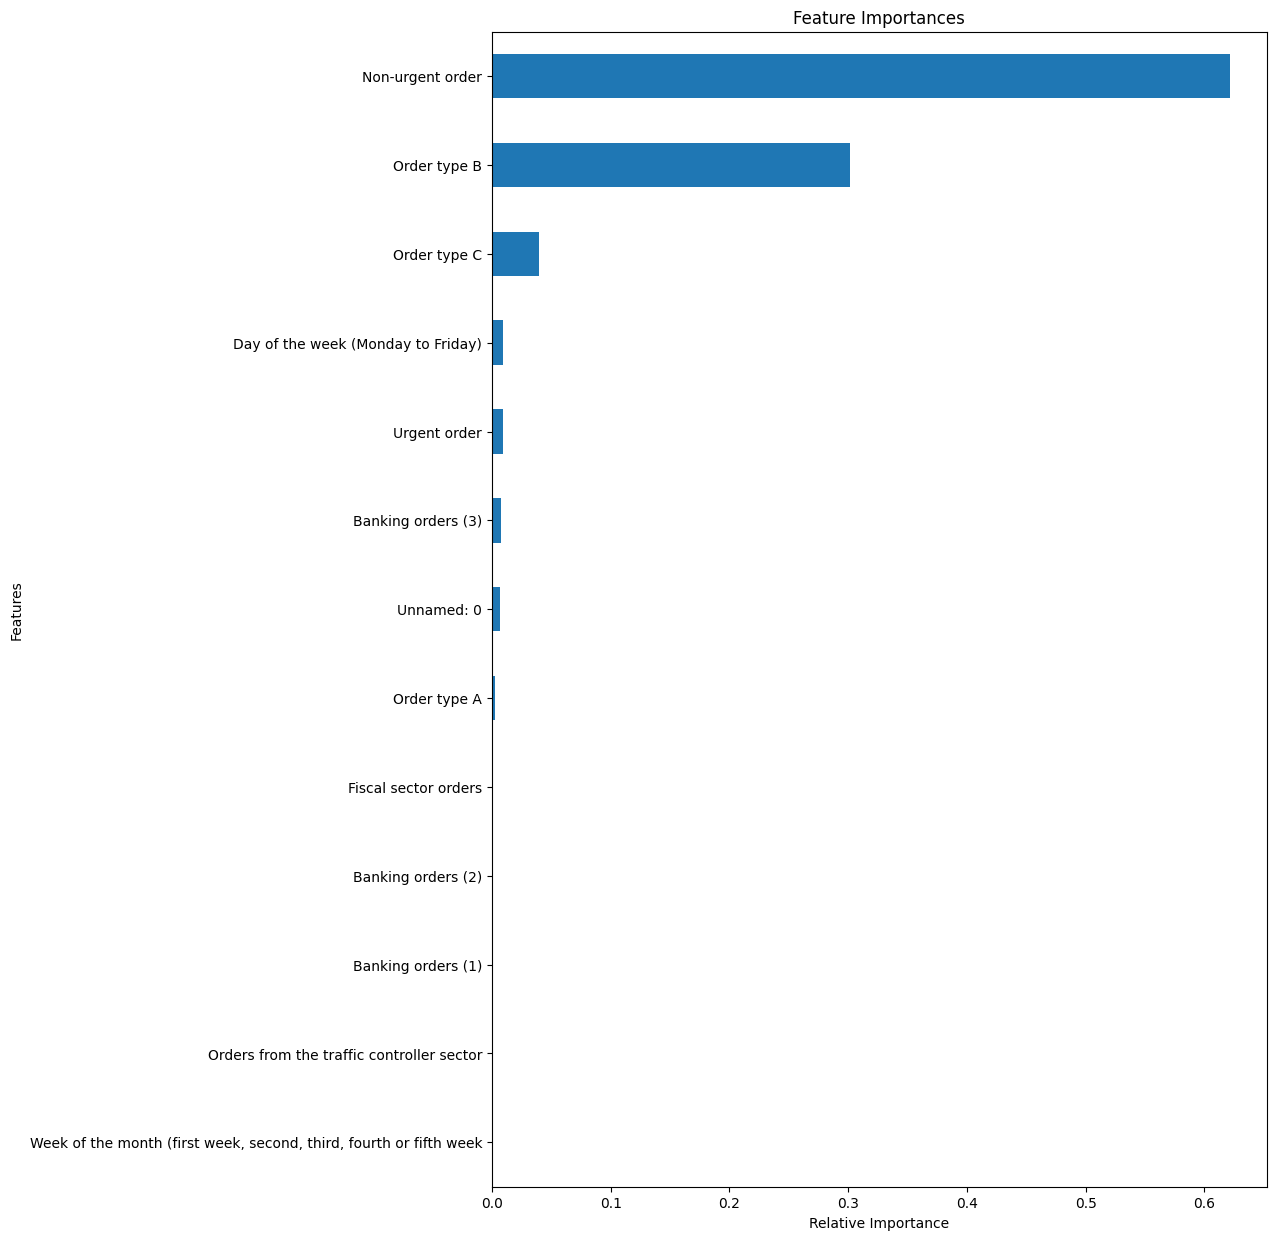

In [ ]:
#plotting important featurwes of the model
plt.figure(figsize=(10,15))
plt.title('Feature Importances')
feat_importances = pd.Series(dt_model.feature_importances_, index=X_check.columns)
feat_importances.sort_values().plot(kind='barh')

plt.xlabel('Relative Importance')
plt.ylabel('Features')
plt.show()

- The plot shows feature importance from the most important to the least important.
- Non- urgent order is the most important feature while week of the month is the least important feature.

In [ ]:
#columns that are not important are dropped
df_new = df.drop(columns=['Unnamed: 0',
                          'Week of the month (first week, second, third, fourth or fifth week',
                          'Banking orders (2)',
                          'Banking orders (1)',
                          'Orders from the traffic controller sector',
                          'Fiscal sector orders',
                          'Order type A'])

- Columns that carry little importance have been dropped

In [ ]:
#checking the remaining columns
df_new.columns

Index(['Day of the week (Monday to Friday)', 'Non-urgent order',
       'Urgent order', 'Order type B', 'Order type C', 'Banking orders (3)',
       'Target (Total orders)'],
      dtype='object')

- Thoe output above shows a list of the remaining columns.
- There are 6 remaining columns and 1 target column left.

In [ ]:
X = df_new.drop(columns=['Target (Total orders)'])
y = df_new['Target (Total orders)']

TRAIN TEST SPLIT FOR MODEL VALIDATION

In [ ]:
#splitting the dataset to training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2, random_state=42)

In [ ]:
#initializing the scaler
scaler = StandardScaler()

#scaling the dataset
scaler.fit(X)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

- The dataset was scaled using the standard scaler

**FITTING A LINEAR REGRESSION**

In [ ]:
#fitting a linear regression model on the train set
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

LinearRegression()

- A linear regression model was used on the train set

In [ ]:
#getting the R2 score of the model on the train set
print("The r2_score of Training set is: ", r2_score(lr_model.predict(X_train_scaled), y_train))

The r2_score of Training set is:  0.9906727198780121


In [ ]:
#getting the r2 score on the test set
print("The r2_score of Test set is: ", r2_score(lr_model.predict(X_test_scaled), y_test))

The r2_score of Test set is:  0.9268815767946441


- The R2 score on the train set and the test set have been gotten. The train set has a score 0.9907 while the test set has a score of 0.9269.
- This shows that our model is overfitting

In [ ]:
#getting the accuracy on the test set
print("The model score for Test set is: ",  lr_model.score(X_test_scaled, y_test))

The model score for Test set is:  0.9277808811369415


- The accuracy on the testing set is 0.9278

**EVALUATION OF DIFFERENT REGRESSION MODELS**

Different egression models were used on the dataset to see which model has the best performance.

In [ ]:
# creating a dictionary of the models
models = {
    'Linear Regression': LinearRegression(),
    'Lasso': Lasso(),
    'Ridge': Ridge(),
    'XGBoost Regressor': XGBRegressor(),
    'DecisionTree Regressor': DecisionTreeRegressor(),
    'Catboost': CatBoostRegressor(),
    'KNeighborRegressor': KNeighborsRegressor(),
    'GradientBoosting': GradientBoostingRegressor(),
    'OrthogonalMatchingPursuitCV': OrthogonalMatchingPursuitCV(),
    'RandomForestRegressor': RandomForestRegressor()

}

In [ ]:
#defining a function to fit and calculate the scores of different models
def fit_and_score(models, X_train, X_test, y_train, y_test):
  np.random.seed(42)

  model_test_scores={}
  model_train_scores={}
  r2_train_scores={}
  r2_test_scores={}
  mse_train_scores={}
  mse_test_scores={}

  for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)

    model_test_scores[name]= model.score(X_test, y_test)
    model_train_scores[name]= model.score(X_train, y_train)

    r2_test_scores[name]= r2_score(y_pred, y_test)
    r2_train_scores[name]= r2_score(y_pred_train, y_train)

    mse_test_scores[name]= mean_squared_error(y_pred, y_test)
    mse_train_scores[name]= mean_squared_error(y_pred_train, y_train)

  return (model_test_scores,
         model_train_scores,
         r2_test_scores,
         r2_train_scores,
         mse_test_scores,
         mse_train_scores)

In [ ]:
#using the function to fit on the data and get the scores
(test_score,
 train_score,
 r2_test,
 r2_train,
 mse_test,
 mse_train) = fit_and_score(models, X_train_scaled, X_test_scaled, y_train, y_test)

Learning rate set to 0.025341
0:	learn: 80.5344503	total: 178ms	remaining: 2m 58s
1:	learn: 79.7353185	total: 180ms	remaining: 1m 29s
2:	learn: 78.7945597	total: 182ms	remaining: 1m
3:	learn: 78.0394671	total: 183ms	remaining: 45.7s
4:	learn: 77.1241036	total: 185ms	remaining: 36.8s
5:	learn: 76.3118347	total: 187ms	remaining: 30.9s
6:	learn: 75.5286814	total: 188ms	remaining: 26.7s
7:	learn: 74.7532233	total: 190ms	remaining: 23.6s
8:	learn: 73.7365976	total: 192ms	remaining: 21.1s
9:	learn: 72.8002602	total: 194ms	remaining: 19.2s
10:	learn: 71.9520539	total: 196ms	remaining: 17.6s
11:	learn: 70.9964371	total: 197ms	remaining: 16.2s
12:	learn: 70.2393333	total: 199ms	remaining: 15.1s
13:	learn: 69.3697711	total: 201ms	remaining: 14.2s
14:	learn: 68.5996452	total: 204ms	remaining: 13.4s
15:	learn: 67.8921456	total: 206ms	remaining: 12.7s
16:	learn: 67.2066771	total: 208ms	remaining: 12s
17:	learn: 66.4641667	total: 210ms	remaining: 11.4s
18:	learn: 65.6053612	total: 211ms	remaining: 1

C:\Users\kandh\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:133: FutureWarning:

The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), OrthogonalMatchingPursuitCV())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)





In [ ]:
score = pd.DataFrame({
    "Test Score": test_score,
    "Test r2": r2_test,
    "Test mse": mse_test,
    "Train Score": train_score,
    "Train r2": r2_train,
    "Train mse": mse_train,

}, index=train_score.keys())

In [ ]:
score.sort_values(by='Test r2')

Test Score   Test r2     Test mse  Train Score  \
RandomForestRegressor          0.700502  0.387304  3065.484110     0.980575   
DecisionTree Regressor         0.236381  0.499505  7815.939649     1.000000   
Catboost                       0.765268  0.542927  2402.576502     0.999968   
KNeighborRegressor             0.761277  0.573622  2443.422835     0.826748   
GradientBoosting               0.800971  0.696025  2037.143028     0.999986   
XGBoost Regressor              0.654837  0.710349  3532.875659     1.000000   
Lasso                          0.910188  0.905533   919.262731     0.989674   
OrthogonalMatchingPursuitCV    0.927158  0.926127   745.563555     0.990706   
Linear Regression              0.927781  0.926882   739.191046     0.990759   
Ridge                          0.948331  0.945754   528.852101     0.990234   

                             Train r2     Train mse  
RandomForestRegressor        0.976337  1.285898e+02  
DecisionTree Regressor       1.000000  0.000000e+00  
Catboost                     0.999968  2.103728e-01  
KNeighborRegressor           0.632260  1.146869e+03  
GradientBoosting             0.999986  9.514906e-02  
XGBoost Regressor            1.000000  6.531043e-07  
Lasso                        0.989238  6.835310e+01  
OrthogonalMatchingPursuitCV  0.990618  6.152543e+01  
Linear Regression            0.990673  6.117279e+01  
Ridge                        0.989945  6.464664e+01

**Applying pca on the model**

PCA was used to reduce noise on the data and also check to see if it would help increase the accuracy of our models.

In [ ]:
#initializing pca
#5 components were used
pca = PCA(n_components = 5)

In [ ]:
#COPYING THE DATASET
X_train_scaled1 = X_train_scaled.copy()
#creating a dtaframe of the dataset
X_train_scaled1 = pd.DataFrame(X_train_scaled, columns = X_train.columns)
X_train_scaled1.head()

Day of the week (Monday to Friday)  Non-urgent order  Urgent order  \
0                            0.695422         -0.024475      0.465497   
1                           -1.462783         -0.018251      0.324610   
2                           -0.023980         -1.103546     -1.173819   
3                            1.414823         -0.974113     -0.379788   
4                           -1.462783          0.671769      0.202651   

   Order type B  Order type C  Banking orders (3)  
0      0.224938      0.437359            1.025338  
1      0.080771      0.553647           -0.359843  
2     -0.549595     -1.585533           -0.592470  
3     -0.750363     -0.622839           -0.422966  
4      0.775967      0.547807           -0.970749

In [ ]:
#COPYING THE DATASET
X_test_scaled1 = X_test_scaled.copy()
X_test_scaled1 = pd.DataFrame(X_test_scaled, columns = X_test.columns)
X_test_scaled1.head()

Day of the week (Monday to Friday)  Non-urgent order  Urgent order  \
0                           -0.023980          2.085656      3.872880   
1                           -0.023980         -0.894171     -0.837338   
2                           -1.462783          3.035411      0.783867   
3                           -1.462783          0.221331      1.801327   
4                           -1.462783          0.693343      0.834528   

   Order type B  Order type C  Banking orders (3)  
0      1.318768      3.964285           -0.638259  
1     -1.163148     -0.332471            0.141998  
2      3.008980      0.306665            1.878075  
3      0.414736      0.698916           -0.971899  
4      0.231238      1.381268            0.465820

In [ ]:
#transforming the dataset using pca
X_train_pca = pca.fit_transform(X_train_scaled1)
X_test_pca = pca.transform(X_test_scaled1)

- Here, pca was fit and transformed on the training set and transformed on the test set to avoid leakage of data.

In [ ]:
# using the function defined above to fit the model
(test_score1,
 train_score1,
 r2_test1,
 r2_train1,
 mse_test1,
 mse_train1) = fit_and_score(models, X_train_pca, X_test_pca, y_train, y_test)

Learning rate set to 0.025341
0:	learn: 80.6081663	total: 923us	remaining: 923ms
1:	learn: 80.1728271	total: 1.72ms	remaining: 856ms
2:	learn: 79.5775387	total: 2.51ms	remaining: 834ms
3:	learn: 78.8416390	total: 3.27ms	remaining: 814ms
4:	learn: 78.1360119	total: 4.08ms	remaining: 811ms
5:	learn: 77.5448796	total: 4.81ms	remaining: 796ms
6:	learn: 76.6723401	total: 5.52ms	remaining: 783ms
7:	learn: 76.0715238	total: 6.35ms	remaining: 788ms
8:	learn: 75.2664464	total: 7.07ms	remaining: 779ms
9:	learn: 74.6460909	total: 7.86ms	remaining: 778ms
10:	learn: 73.9998408	total: 8.54ms	remaining: 768ms
11:	learn: 73.4028693	total: 9.27ms	remaining: 763ms
12:	learn: 72.8912771	total: 10.1ms	remaining: 766ms
13:	learn: 72.2668218	total: 10.8ms	remaining: 760ms
14:	learn: 71.6304211	total: 11.5ms	remaining: 757ms
15:	learn: 70.8722939	total: 12ms	remaining: 735ms
16:	learn: 70.2002173	total: 12.4ms	remaining: 718ms
17:	learn: 69.6628148	total: 13.2ms	remaining: 720ms
18:	learn: 68.9806584	total: 

C:\Users\kandh\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:133: FutureWarning:

The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), OrthogonalMatchingPursuitCV())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)





In [ ]:
score_pca = pd.DataFrame({
    "Test Score": test_score1,
    "Test r2": r2_test1,
    "Test mse": mse_test1,
    "Train Score": train_score1,
    "Train r2": r2_train1,
    "Train mse": mse_train1,

}, index=train_score1.keys())

In [ ]:
score_pca.sort_values(by='Test r2')

Test Score   Test r2     Test mse  Train Score  \
Catboost                       0.707000  0.155951  2998.968340     0.999989   
KNeighborRegressor             0.786566  0.602503  2184.576345     0.826985   
DecisionTree Regressor         0.629346  0.694607  3793.790799     1.000000   
RandomForestRegressor          0.856491  0.797377  1468.873144     0.965645   
XGBoost Regressor              0.919257  0.914228   826.432714     1.000000   
GradientBoosting               0.935316  0.926851   662.061642     0.999955   
Lasso                          0.967548  0.964405   332.160607     0.987255   
Ridge                          0.969999  0.968062   307.073957     0.988488   
Linear Regression              0.971611  0.970388   290.575555     0.988623   
OrthogonalMatchingPursuitCV    0.977430  0.975976   231.007998     0.988078   

                             Train r2     Train mse  
Catboost                     0.999989  7.092091e-02  
KNeighborRegressor           0.633608  1.145300e+03  
DecisionTree Regressor       1.000000  0.000000e+00  
RandomForestRegressor        0.956310  2.274198e+02  
XGBoost Regressor            1.000000  5.981038e-07  
GradientBoosting             0.999955  2.946856e-01  
Lasso                        0.986782  8.436516e+01  
Ridge                        0.988139  7.620372e+01  
Linear Regression            0.988492  7.531370e+01  
OrthogonalMatchingPursuitCV  0.987934  7.891884e+01

In [ ]:
om = OrthogonalMatchingPursuitCV()
#X_train_pca, X_test_pca, y_train, y_test
om.fit(X_train_pca, y_train)

C:\Users\kandh\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:133: FutureWarning:

The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), OrthogonalMatchingPursuitCV())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)





OrthogonalMatchingPursuitCV()

In [ ]:
print("The r2_score of Training set is: ", r2_score(om.predict(X_train_pca), y_train))

The r2_score of Training set is:  0.9879342550868228


In [ ]:
print("The r2_score of Training set is: ", r2_score(om.predict(X_test_pca), y_test))

The r2_score of Training set is:  0.9759760022418917


In [ ]:
print("The model score for Test set is: ", (om.score(X_test_pca, y_test)))

The model score for Test set is:  0.9774304706126216


In [ ]:
y_pred = om.predict(X_test_pca)

In [ ]:
prediction = pd.DataFrame({
    "True Value": y_test,
    "Predicted Value": y_pred,
    "Residual": y_test-y_pred
})

In [ ]:
prediction

True Value  Predicted Value   Residual
0      539.577       552.228336 -12.651336
1      207.364       211.207836  -3.843836
2      530.944       519.898736  11.045264
3      357.394       357.294685   0.099315
4      363.402       365.249328  -1.847328
5      213.509       221.960746  -8.451746
6      346.035       349.759973  -3.724973
7      402.607       355.968927  46.638073
8      308.178       318.068287  -9.890287
9      303.447       310.416689  -6.969689
10     259.246       265.701535  -6.455535
11     342.606       347.439081  -4.833081

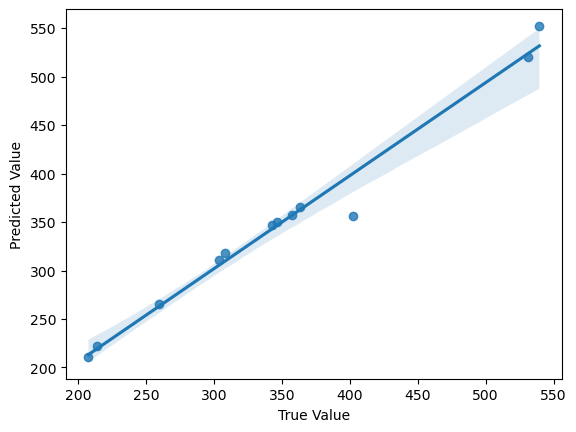

In [ ]:
sns.regplot(x= 'True Value', y='Predicted Value', data=prediction);

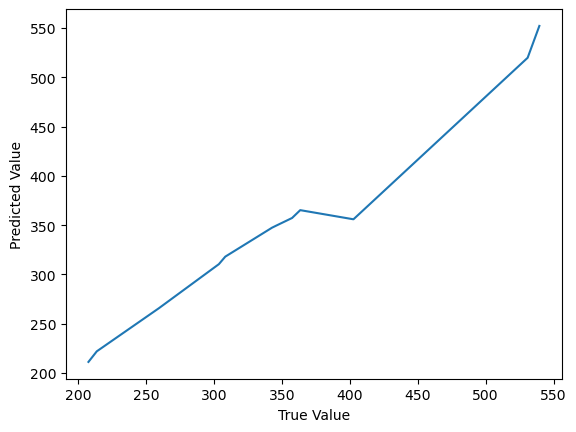

In [ ]:
sns.lineplot(x= 'True Value', y='Predicted Value', data=prediction);

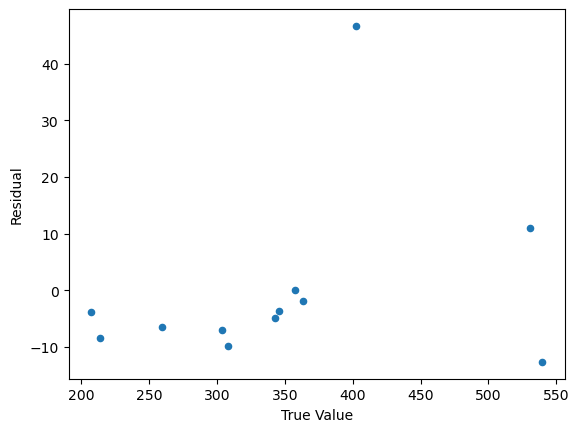

In [ ]:
#plotting the true value against the residual

scatter = prediction.plot(kind='scatter', x="True Value", y='Residual')

<AxesSubplot:xlabel='Predicted Value', ylabel='Residual'>

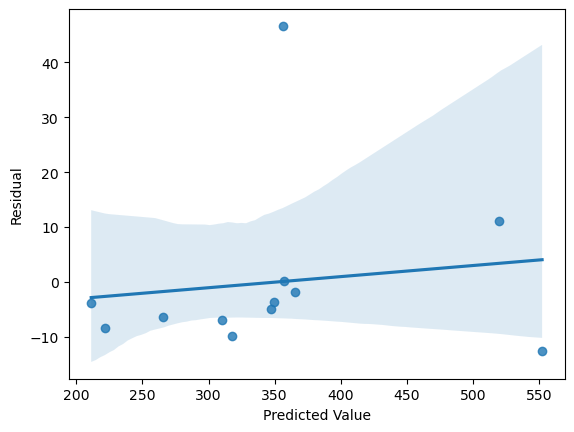

In [ ]:
sns.regplot( x='Predicted Value',y= 'Residual', data=prediction)

<AxesSubplot:xlabel='Residual', ylabel='Count'>

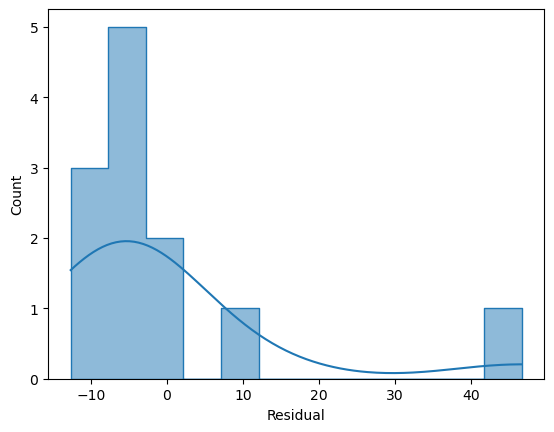

In [ ]:
sns.histplot(prediction['Residual'], kde=True, element='step')

In [ ]:
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px

In [ ]:
prediction = pd.DataFrame({
    "True Value": y_test,
    "Predicted Value": y_pred,
    "Residual": y_test-y_pred
})

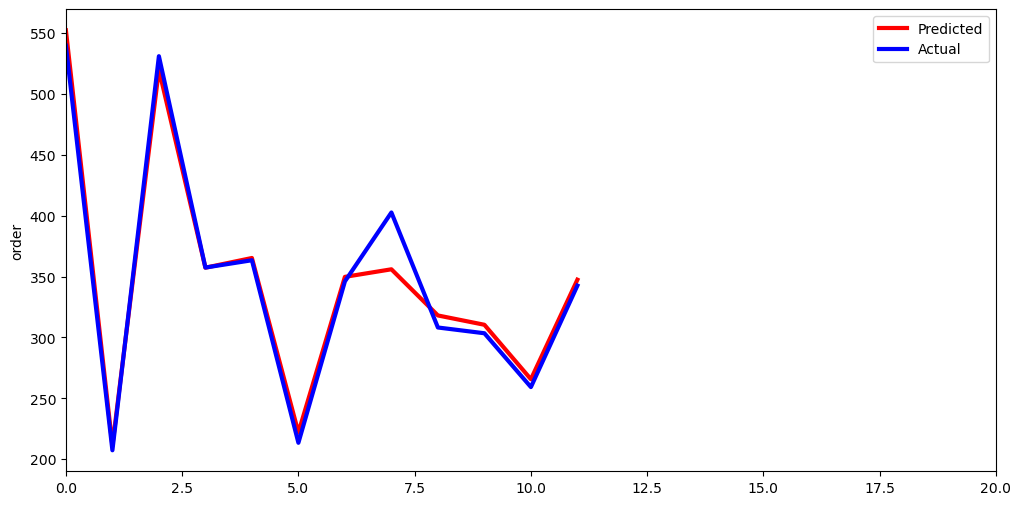

In [ ]:
#plot predict vs actual and limit it to first 50
plt.figure(figsize=(12,6))
plt.plot(y_pred, label='Predicted', linewidth=3,color='red')
plt.plot(y_test, label='Actual', linewidth=3, color='blue')
plt.xlim([0,20])
plt.ylabel('order')
plt.legend()
plt.show()